# Recurrent Neural Networks

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Time series forecasting

In [2]:
df = pd.read_csv('./data/cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [3]:
from pandas.tseries.offsets import MonthEnd

In [4]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


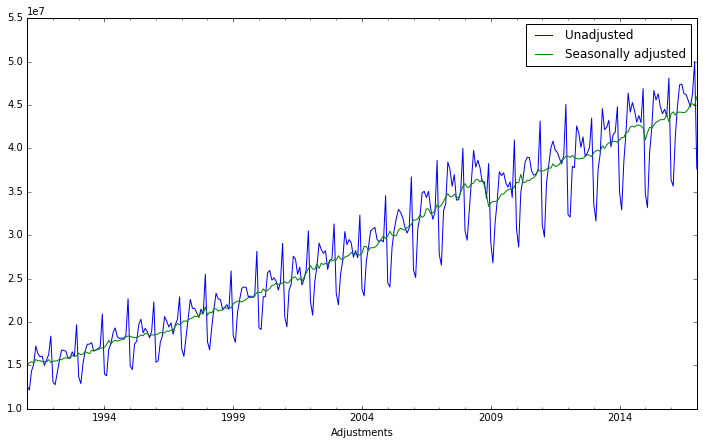

In [5]:
df.plot(figsize = (12,7))

In [6]:
split_date = pd.Timestamp('01-01-2011')

In [7]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

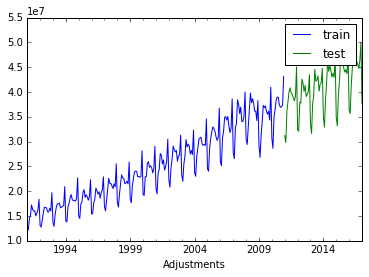

In [8]:
ax = train.plot()
test.plot(ax = ax)
plt.legend(['train', 'test'])

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

# Tranforming only on the train data
# Fit to it on the test data
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [10]:
train_sc[:4]

array([[ 0.01402033],
       [ 0.        ],
       [ 0.0704258 ],
       [ 0.09531795]])

In [11]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

### Fully connected predictor

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [13]:
K.clear_session()

model = Sequential()
model.add(Dense(12, 
                input_dim = 1, 
                activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error', 
              metrics = ['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stop = EarlyStopping(monitor = 'loss', 
                           patience = 10, 
                           verbose = 1)

In [15]:
model.fit(X_train, 
          y_train, 
          epochs = 200,
          batch_size = 2, 
          verbose = 2,
          callbacks = [early_stop])

Epoch 1/200
0s - loss: 0.2012 - mean_absolute_error: 0.3609
Epoch 2/200
0s - loss: 0.0498 - mean_absolute_error: 0.1731
Epoch 3/200
0s - loss: 0.0273 - mean_absolute_error: 0.1382
Epoch 4/200
0s - loss: 0.0238 - mean_absolute_error: 0.1312
Epoch 5/200
0s - loss: 0.0216 - mean_absolute_error: 0.1247
Epoch 6/200
0s - loss: 0.0197 - mean_absolute_error: 0.1184
Epoch 7/200
0s - loss: 0.0179 - mean_absolute_error: 0.1113
Epoch 8/200
0s - loss: 0.0162 - mean_absolute_error: 0.1046
Epoch 9/200
0s - loss: 0.0147 - mean_absolute_error: 0.0987
Epoch 10/200
0s - loss: 0.0136 - mean_absolute_error: 0.0930
Epoch 11/200
0s - loss: 0.0125 - mean_absolute_error: 0.0877
Epoch 12/200
0s - loss: 0.0117 - mean_absolute_error: 0.0831
Epoch 13/200
0s - loss: 0.0112 - mean_absolute_error: 0.0799
Epoch 14/200
0s - loss: 0.0108 - mean_absolute_error: 0.0762
Epoch 15/200
0s - loss: 0.0104 - mean_absolute_error: 0.0738
Epoch 16/200
0s - loss: 0.0102 - mean_absolute_error: 0.0721
Epoch 17/200
0s - loss: 0.0101 - 

In [16]:
y_pred = model.predict(X_test)

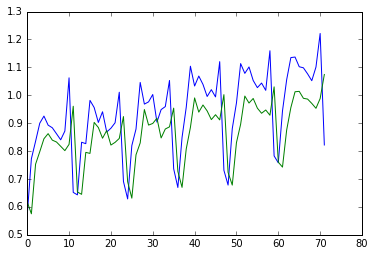

In [17]:
plt.plot(y_test)
plt.plot(y_pred)

### Recurrent predictor

In [18]:
from keras.layers import LSTM

In [19]:
X_train.shape

(239, 1)

In [20]:
#3D tensor with shape (batch_size, timesteps, input_dim)
X_train[:, None].shape

(239, 1, 1)

In [21]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [22]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, 
               input_shape = (1, 1)))

model.add(Dense(1))

model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error', 
              metrics = ['mae'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [24]:
early_stop = EarlyStopping(monitor = 'loss', 
                           patience = 10, 
                           verbose = 1)

In [25]:
model.fit(X_train_t, 
          y_train,
          epochs = 100, 
          batch_size = 1, 
          verbose = 2,
          callbacks=[early_stop])

Epoch 1/100
1s - loss: 0.1535 - mean_absolute_error: 0.3082
Epoch 2/100
0s - loss: 0.0513 - mean_absolute_error: 0.1880
Epoch 3/100
1s - loss: 0.0390 - mean_absolute_error: 0.1694
Epoch 4/100
0s - loss: 0.0317 - mean_absolute_error: 0.1526
Epoch 5/100
1s - loss: 0.0261 - mean_absolute_error: 0.1375
Epoch 6/100
1s - loss: 0.0203 - mean_absolute_error: 0.1202
Epoch 7/100
0s - loss: 0.0159 - mean_absolute_error: 0.1037
Epoch 8/100
0s - loss: 0.0131 - mean_absolute_error: 0.0901
Epoch 9/100
0s - loss: 0.0117 - mean_absolute_error: 0.0824
Epoch 10/100
0s - loss: 0.0108 - mean_absolute_error: 0.0755
Epoch 11/100
0s - loss: 0.0104 - mean_absolute_error: 0.0719
Epoch 12/100
0s - loss: 0.0104 - mean_absolute_error: 0.0696
Epoch 13/100
0s - loss: 0.0101 - mean_absolute_error: 0.0696
Epoch 14/100
0s - loss: 0.0103 - mean_absolute_error: 0.0692
Epoch 15/100
0s - loss: 0.0103 - mean_absolute_error: 0.0700
Epoch 16/100
0s - loss: 0.0102 - mean_absolute_error: 0.0683
Epoch 17/100
0s - loss: 0.0101 - 

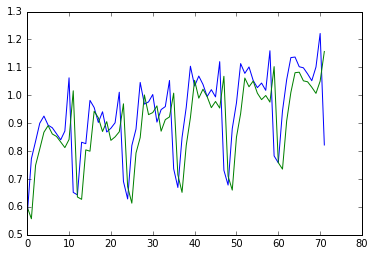

In [26]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

## Windows

In [27]:
train_sc.shape

(240, 1)

In [28]:
train_sc_df = pd.DataFrame(train_sc, 
                           columns = ['Scaled'], 
                           index = train.index)
test_sc_df = pd.DataFrame(test_sc, 
                          columns = ['Scaled'], 
                          index = test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [29]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [30]:
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [31]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [32]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [33]:
X_train.shape

(228, 12)

In [34]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

### Fully Connected on Windows

In [35]:
K.clear_session()

model = Sequential()
model.add(Dense(12, 
                input_dim = 12, 
                activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error', 
              metrics = ['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [36]:
early_stop = EarlyStopping(monitor = 'loss', 
                           patience = 10, 
                           verbose = 1)

In [37]:
model.fit(X_train, 
          y_train, 
          epochs = 200,
          batch_size = 1, 
          verbose = 2, 
          callbacks = [early_stop])

Epoch 1/200
0s - loss: 0.0530 - mean_absolute_error: 0.1460
Epoch 2/200
0s - loss: 0.0049 - mean_absolute_error: 0.0561
Epoch 3/200
0s - loss: 0.0036 - mean_absolute_error: 0.0456
Epoch 4/200
0s - loss: 0.0031 - mean_absolute_error: 0.0414
Epoch 5/200
0s - loss: 0.0028 - mean_absolute_error: 0.0396
Epoch 6/200
0s - loss: 0.0026 - mean_absolute_error: 0.0380
Epoch 7/200
0s - loss: 0.0024 - mean_absolute_error: 0.0368
Epoch 8/200
0s - loss: 0.0023 - mean_absolute_error: 0.0346
Epoch 9/200
0s - loss: 0.0021 - mean_absolute_error: 0.0337
Epoch 10/200
0s - loss: 0.0023 - mean_absolute_error: 0.0345
Epoch 11/200
0s - loss: 0.0020 - mean_absolute_error: 0.0324
Epoch 12/200
0s - loss: 0.0018 - mean_absolute_error: 0.0310
Epoch 13/200
0s - loss: 0.0018 - mean_absolute_error: 0.0304
Epoch 14/200
0s - loss: 0.0017 - mean_absolute_error: 0.0307
Epoch 15/200
0s - loss: 0.0018 - mean_absolute_error: 0.0319
Epoch 16/200
0s - loss: 0.0016 - mean_absolute_error: 0.0304
Epoch 17/200
0s - loss: 0.0015 - 

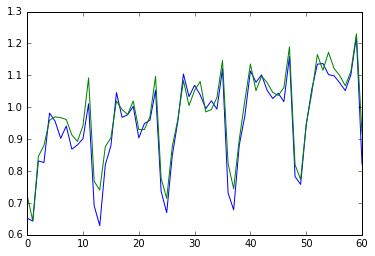

In [38]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

### LSTM on Windows

In [39]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [40]:
X_train_t.shape

(228, 1, 12)

In [41]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, 
               input_shape = (1, 12)))

model.add(Dense(1))

model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error', 
              metrics = ['mae'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 456       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [43]:
early_stop = EarlyStopping(monitor = 'loss', 
                           patience = 10, 
                           verbose = 1)

In [44]:
model.fit(X_train_t, 
          y_train, 
          epochs = 100,
          batch_size = 1, 
          verbose = 2, 
          callbacks = [early_stop])

Epoch 1/100
0s - loss: 0.0311 - mean_absolute_error: 0.1329
Epoch 2/100
0s - loss: 0.0075 - mean_absolute_error: 0.0664
Epoch 3/100
0s - loss: 0.0061 - mean_absolute_error: 0.0582
Epoch 4/100
0s - loss: 0.0054 - mean_absolute_error: 0.0556
Epoch 5/100
0s - loss: 0.0053 - mean_absolute_error: 0.0553
Epoch 6/100
0s - loss: 0.0045 - mean_absolute_error: 0.0505
Epoch 7/100
0s - loss: 0.0041 - mean_absolute_error: 0.0497
Epoch 8/100
0s - loss: 0.0035 - mean_absolute_error: 0.0461
Epoch 9/100
0s - loss: 0.0031 - mean_absolute_error: 0.0435
Epoch 10/100
0s - loss: 0.0028 - mean_absolute_error: 0.0415
Epoch 11/100
0s - loss: 0.0026 - mean_absolute_error: 0.0399
Epoch 12/100
0s - loss: 0.0023 - mean_absolute_error: 0.0380
Epoch 13/100
0s - loss: 0.0022 - mean_absolute_error: 0.0367
Epoch 14/100
0s - loss: 0.0019 - mean_absolute_error: 0.0344
Epoch 15/100
0s - loss: 0.0019 - mean_absolute_error: 0.0344
Epoch 16/100
0s - loss: 0.0019 - mean_absolute_error: 0.0340
Epoch 17/100
0s - loss: 0.0016 - 

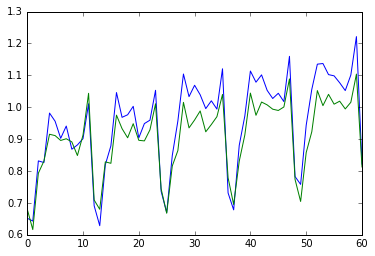

In [45]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

## Exercise 1

In the model above we reshaped the input shape to: `(num_samples, 1, 12)`, i.e. we treated a window of 12 months as a vector of 12 coordinates that we simultaneously passed to all the LSTM nodes. An alternative way to look at the problem is to reshape the input to `(num_samples, 12, 1)`. This means we consider each input window as a sequence of 12 values that we will pass in sequence to the LSTM. In principle this looks like a more accurate description of our situation. But does it yield better predictions? Let's check it.

- Reshape `X_train` and `X_test` so that they represent a set of univariate sequences
- retrain the same LSTM(6) model, you'll have to adapt the `input_shape`
- check the performance of this new model, is it better at predicting the test data?

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((228, 12), (61, 12), (228, 1), (61, 1))

In [47]:
print(X_train[0]) 
print(X_train[1]), 
print(y_train[0])

[ 0.20091289  0.13173822  0.11139526  0.09230917  0.12617398  0.12395846
  0.13514108  0.16362761  0.09531795  0.0704258   0.          0.01402033]
[ 0.03002688  0.20091289  0.13173822  0.11139526  0.09230917  0.12617398
  0.12395846  0.13514108  0.16362761  0.09531795  0.0704258   0.        ]
[ 0.03002688]


In [48]:
X_train = X_train.reshape(-1, 12, 1)
X_test = X_test.reshape(-1, 12, 1)

In [49]:
print(X_train[0]) 

[[ 0.20091289]
 [ 0.13173822]
 [ 0.11139526]
 [ 0.09230917]
 [ 0.12617398]
 [ 0.12395846]
 [ 0.13514108]
 [ 0.16362761]
 [ 0.09531795]
 [ 0.0704258 ]
 [ 0.        ]
 [ 0.01402033]]


In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((228, 12, 1), (61, 12, 1), (228, 1), (61, 1))

In [51]:
from keras.models import Model
from keras.layers import Input, LSTM
import keras.backend as K

K.clear_session()

inp = Input(shape = (12, 1))

net = LSTM(units = 6)(inp)

prediction = Dense(units = 1)(net)

model = Model(inputs = inp, outputs = prediction)

model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error', 
              metrics = ['mae'])

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12, 1)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 6)                 192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [53]:
early_stop = EarlyStopping(monitor = 'loss', 
                           patience = 10, 
                           verbose = 1)

In [54]:
model.fit(X_train, 
          y_train, 
          epochs = 500,
          batch_size = 20, 
          verbose = 2, 
          callbacks = [early_stop])

Epoch 1/500
0s - loss: 0.0516 - mean_absolute_error: 0.1899
Epoch 2/500
0s - loss: 0.0272 - mean_absolute_error: 0.1293
Epoch 3/500
0s - loss: 0.0133 - mean_absolute_error: 0.0888
Epoch 4/500
0s - loss: 0.0094 - mean_absolute_error: 0.0789
Epoch 5/500
0s - loss: 0.0091 - mean_absolute_error: 0.0779
Epoch 6/500
0s - loss: 0.0083 - mean_absolute_error: 0.0738
Epoch 7/500
0s - loss: 0.0077 - mean_absolute_error: 0.0697
Epoch 8/500
0s - loss: 0.0073 - mean_absolute_error: 0.0666
Epoch 9/500
0s - loss: 0.0069 - mean_absolute_error: 0.0640
Epoch 10/500
0s - loss: 0.0067 - mean_absolute_error: 0.0616
Epoch 11/500
0s - loss: 0.0064 - mean_absolute_error: 0.0597
Epoch 12/500
0s - loss: 0.0063 - mean_absolute_error: 0.0582
Epoch 13/500
0s - loss: 0.0062 - mean_absolute_error: 0.0576
Epoch 14/500
0s - loss: 0.0061 - mean_absolute_error: 0.0561
Epoch 15/500
0s - loss: 0.0061 - mean_absolute_error: 0.0557
Epoch 16/500
0s - loss: 0.0061 - mean_absolute_error: 0.0560
Epoch 17/500
0s - loss: 0.0060 - 

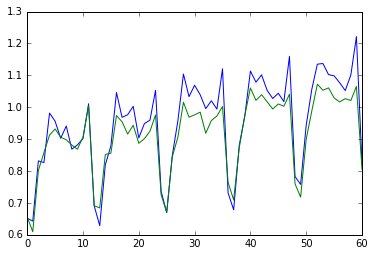

In [55]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

## Exercise 2

RNN models can be applied to images too. In general we can apply them to any data where there's a connnection between nearby units. Let's see how we can easily build a model that works with images.

- Load the MNIST data, by now you should be able to do it blindfolded :)
- reshape it so that an image looks like a long sequence of pixels
- create a recurrent model and train it on the training data
- how does it perform compared to a fully connected? How does it compare to Convolutional Neural Networks?

(feel free to run this exercise on a cloud GPU if it's too slow on your laptop)

In [56]:
from keras.datasets import mnist

In [57]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path = 'mnist.npz')

In [58]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Regularization
X_train /= 255.0
X_test /= 255.0

In [59]:
from keras.utils import to_categorical

In [60]:
Y_train.shape

(60000,)

In [61]:
Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

In [62]:
Y_train_cat.shape, Y_test_cat.shape

((60000, 10), (10000, 10))

In [63]:
X_train = X_train.reshape(X_train.shape[0], -1, 1)
X_test = X_test.reshape(X_test.shape[0], -1, 1)

In [64]:
X_train.shape, X_test.shape

((60000, 784, 1), (10000, 784, 1))

In [65]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import keras.backend as K

In [66]:
K.clear_session()

In [67]:
inp = Input(shape = X_train.shape[1:])

In [68]:
net = LSTM(units = 32)(inp)
prediction = Dense(units = 10, 
                   activation = 'softmax')(net)

model = Model(inputs = inp, 
              outputs = prediction)
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784, 1)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 4,682
Trainable params: 4,682
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor = 'loss', 
                           patience = 1, 
                           verbose = 1)

In [ ]:
model.fit(X_train, 
          Y_train_cat, 
          epochs = 2,
          batch_size = 1000,
          validation_split = 0.3,
          verbose = 1, 
          callbacks = [early_stop])

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 395s - loss: 2.2995 - acc: 0.1183 - val_loss: 2.2751 - val_acc: 0.1223

In [ ]:
model.evaluate(X_test, Y_test_cat)